In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
def CalcularError(y_test, y_pred):
    return sum(abs((y_pred[i]-y_test[i]))for i in range(len(y_test)))

def Grafica1(x_test, predictions, y_test, iterations):
    plt.figure(figsize=(10,6))
    for i in range(iterations):
        plt.plot(x_test, predictions[i], label=f'Iteración {i+1}')
    plt.scatter(x_test, y_test, color='red', label='Datos de prueba')
    plt.title('Regresión Lineal')
    plt.xlabel('Terreno (m2)')
    plt.ylabel('Precio (MDP)')
    plt.legend()
    plt.show()

def Grafica2(errors, iterations):
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, iterations+1), errors, color='red')
    plt.title('Error de estimación')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.show()

## BDG Monovariable

In [13]:
df = pd.read_csv('casas.csv')
print(df)

   Terreno (m2)  Precio (MDP)
0         440.0          1.01
1         616.0          1.42
2         381.0          0.88
3         963.0          2.21
4         431.0          0.99
5         255.0          0.59
6         594.0          1.37
7         625.0          1.44
8         708.0          1.63
9         468.0          1.08


In [14]:
x = df[['Terreno (m2)']].values
y = df['Precio (MDP)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

In [15]:
def BGD_Mono(x,y,iterations,alpha,weight,x_test,y_test):
    wi = 0
    sumA = 0
    predictions = []
    errors = []
    for i in range(0,iterations):
        for j in range(0,len(x)):
            sumA += ((wi*x[j])-y[j])*x[j]
        wi = wi - alpha*(2*sumA)
        wi = wi - weight
        weight = wi
        print(f'Iteracion {i+1}: w = {weight}\n')
        y_pred = [weight * xi for xi in x_test]
        print(f'Prediccion : {y_pred}')
        error = CalcularError(y_test, y_pred)
        print(f'Error = {error}\n')
        predictions.append(y_pred)
        errors.append(error)
    print(f'Y_test {y_test}')
    Grafica1(x_test, predictions, y_test, iterations)
    Grafica2(errors, iterations)

Iteracion 1: w = [0.00081438]

Prediccion : [array([0.31027985]), array([0.57658302]), array([0.35099899])]
Error = [2.26213814]

Iteracion 2: w = [0.00134055]

Prediccion : [array([0.51074827]), array([0.94910703]), array([0.57777561])]
Error = [1.46236909]

Iteracion 3: w = [0.0016805]

Prediccion : [array([0.64026874]), array([1.18979073]), array([0.72429351])]
Error = [0.94564702]

Iteracion 4: w = [0.00190013]

Prediccion : [array([0.7239505]), array([1.34529384]), array([0.81895713])]
Error = [0.61179853]

Y_test [0.88 1.63 0.99]


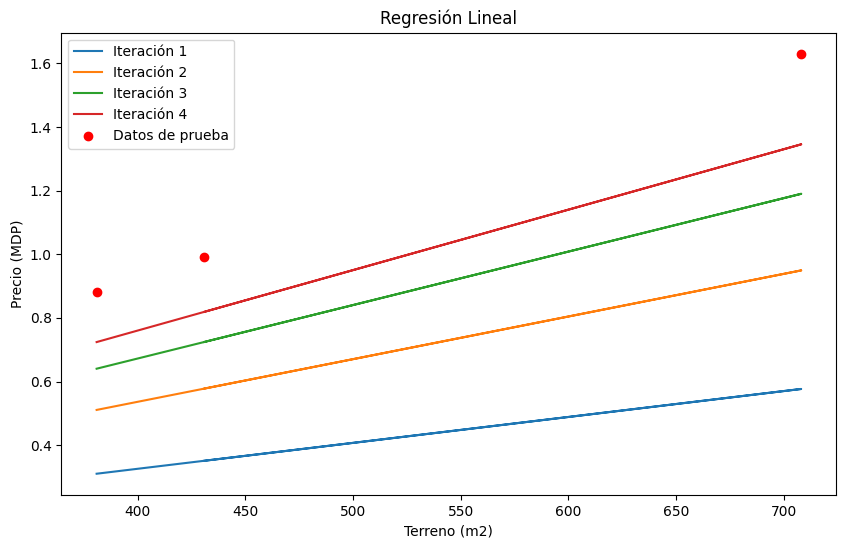

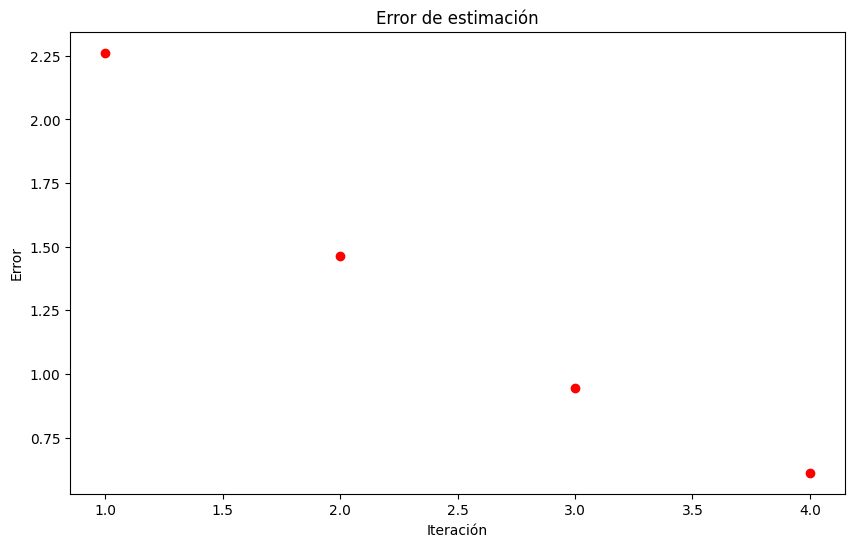

In [16]:
alpha = 0.00000007
iterations = 4
weight = 0.0

BGD_Mono(x_train,y_train,iterations,alpha,weight,x_test,y_test)

## BGD Multivariable

In [17]:
df2 = pd.read_csv('Dataset_multivariable.csv')
df2

,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2
5,1.0,1.4,-27.0,32.0,18.7,26.1
6,1.0,1.6,-30.0,36.0,20.4,29.0
7,1.0,1.8,-33.0,40.0,22.1,31.9
8,1.0,2.0,-36.0,44.0,23.8,34.8
9,1.0,2.2,-39.0,48.0,25.5,37.7


In [18]:
x = df2.drop('y', axis=1).values
y = df2['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

In [19]:
def BGD_Multi(x,y,iterations,alpha,weight,x_test,y_test):
    errors = []
    predictions = []
    for k in range(iterations):
        for i, wi in enumerate(weight):
            sum = np.dot((wi * x[:,i] - y), x[:,i])
            wi = wi - 2 * alpha * sum
            weight[i] = wi
            y_pred = np.dot(x_test, weight)
            error = CalcularError(y_test, y_pred)
        predictions.append(y_pred)
        errors.append(error)
        print(f'Iteración {k+1}: w = {weight}')
        print(f'Predicción: {y_pred}')
        print(f'Error: {error}')
    print(f'Y_test {y_test}')
    Grafica2(errors, iterations)

Iteración 1: w = [0.0020532, 0.0030832800000000007, -0.0585684, 0.0698784, 0.04016964]
Predicción: [3.00262613 6.14736919 4.05087382]
Error: 62.199130864
Iteración 2: w = [0.004106227531199999, 0.006166037569036801, -0.1135882577808, 0.13371930624, 0.07918998642996]
Predicción: [ 5.80499764 11.87398673  7.827994  ]
Error: 49.89302162435803
Iteración 3: w = [0.006159082608087379, 0.009248272795631104, -0.1652745724183769, 0.19204435818086402, 0.11709392172821241]
Predicción: [ 8.4218645  17.21132733 11.35168545]
Error: 38.415122717705565
Iteración 4: w = [0.0082117652451483, 0.012329985768288613, -0.2138293166246923, 0.24533012563403736, 0.15391338753364653]
Predicción: [10.86682804 22.18839129 14.64068245]
Error: 27.704098224303586
Y_test [17.4 34.8 23.2]


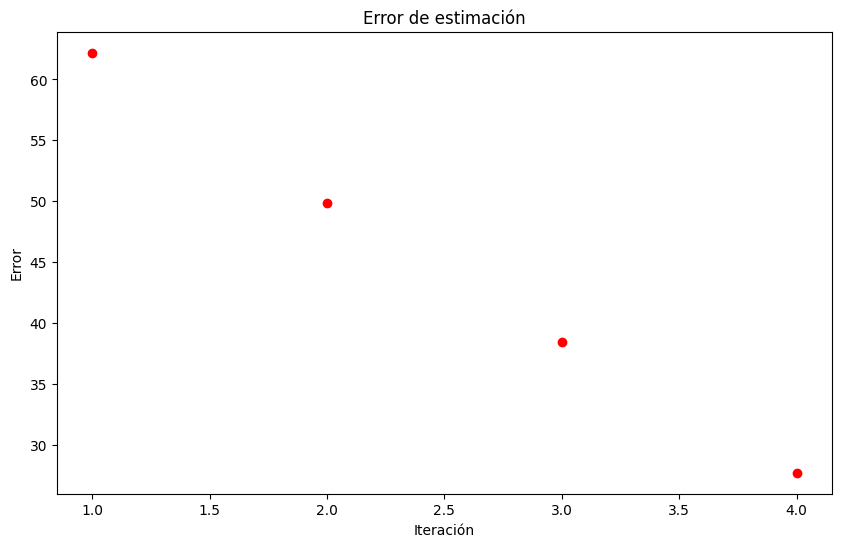

In [20]:
alpha = 0.000006
iterations = 4
weight = [0.0,0.0,0.0,0.0,0.0]
BGD_Multi(x_train,y_train,iterations,alpha,weight,x_test,y_test)